In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, Normalizer, LabelEncoder, OrdinalEncoder

from tableshift import get_dataset
from tableshift.core.features import PreprocessorConfig
from tableshift.core.tasks import get_task_config

In [60]:
[f for f in features if f.name == 'problem_type'][0].value_mapping

In [61]:

len(sorted([f for f in features if f.name == 'skill_id'][0].value_mapping.items()))

245

In [3]:

data = [
    [ 'ASSISTments',             'assistments'             ],
    [ 'Childhood Lead',          'nhanes_lead'             ],
    [ 'College Scorecard',       'college_scorecard'       ], 
    [ 'Diabetes',                'brfss_diabetes'          ],
    [ 'FICO HELOC',              'heloc'                   ],
    [ 'Food Stamps',             'acsfoodstamps'           ],
    [ 'Hospital Readmission',    'diabetes_readmission'    ],    
    [ 'Hypertension',            'brfss_blood_pressure'    ],    
    #[ 'ICU Length of Stay'       'mimic_extract_los_3'     ],    
    #[ 'ICU Mortality',           'mimic_extract_mort_hosp' ],        
    [ 'Income',                  'acsincome'               ],
    #[ 'Public Health Insurance', 'acspubcov'               ],
    [ 'Sepsis',                  'physionet'               ],
    [ 'Unemployment',            'acsunemployment'         ],
    [ 'Voting',                  'anes'                    ]
    ]


In [13]:
np.array(data)[:,0]

array(['ASSISTments', 'Childhood Lead', 'College Scorecard', 'Diabetes',
       'FICO HELOC', 'Food Stamps', 'Hospital Readmission',
       'Hypertension', 'Income', 'Sepsis', 'Unemployment', 'Voting'],
      dtype='<U20')

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/tmp/ipykernel_92962/2274561500.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  np.array([[0,1,2],[3,np.nan,2][np.nan, np.nan, 4]])
/tmp/ipykernel_92962/2274561500.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  np.array([[0,1,2],[3,np.nan,2][np.nan, np.nan, 4]])
/tmp/ipykernel_92962/2274561500.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  np.array([[0,1,2],[3,np.nan,2][np.nan, np.nan, 4]])


TypeError: list indices must be integers or slices, not tuple

In [8]:
{d: get_task_config(i).feature_list.documentation for d,i in data}

{'ASSISTments': 'https://www.kaggle.com/datasets/nicolaswattiez/skillbuilder-data-2009-2010 ,https://sites.google.com/site/assistmentsdata/datasets/2012-13-school-data-with-affect',
 'Childhood Lead': 'https://wwwn.cdc.gov/Nchs/Nhanes/',
 'College Scorecard': None,
 'Diabetes': None,
 'FICO HELOC': 'Data dictionary .xslx file can be accessed after filling \nout the data agreement at https://community.fico.com/s/explainable-machine\n-learning-challenge ',
 'Food Stamps': 'https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2019.pdf',
 'Hospital Readmission': 'http://www.hindawi.com/journals/bmri/2014/781670/',
 'Hypertension': None,
 'Income': 'https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_Data_Dictionary_2014-2018.pdf',
 'Sepsis': 'https://physionet.org/content/challenge-2019/1.0.0/physionet_challenge_2019_ccm_manuscript.pdf',
 'Unemployment': 'https://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMS_

In [96]:
for dataset,identifier in data:
    features = get_task_config(identifier).feature_list.features
    categorical_features = [(f.name, f.kind.__name__) for f in features if f.kind.__name__ == 'CategoricalDtype' and not f.is_target and f.value_mapping]
    
    dset = get_dataset(
        name=identifier,
        initialize_data=False,
        use_cached=True
    )

    X_a, y_a, _, _ = dset.get_pandas('train')
    X_b, y_b, _, _ = dset.get_pandas('ood_test')

    categorical_features_ = {name for name,kind in categorical_features if name in X_a.columns and X_a[name].dtype.name != 'object'}

    if categorical_features_:
        print(dataset, categorical_features_)

Diabetes {'INCOME', 'BMI5CAT', 'TOTINDA', 'CVDSTRK3', 'MEDCOST', 'STATE', 'HIGH_BLOOD_PRESS', 'CHOL_CHK_PAST_5_YEARS', 'HEALTH_COV', 'FRUIT_ONCE_PER_DAY', 'VEG_ONCE_PER_DAY', 'SMOKE100', 'MARITAL', 'EDUCA', 'RFBING5', 'CHECKUP1', 'MICHD'}
FICO HELOC {'MaxDelq2PublicRecLast12M', 'MaxDelqEver'}
Food Stamps {'DREM', 'FER', 'WRK', 'MAR', 'CIT', 'NWLK', 'SCHL', 'PUBCOV', 'ANC', 'NATIVITY', 'RELP', 'DEAR', 'MIL', 'DIS', 'NWLA', 'DEYE', 'ENG'}
Hypertension {'MEDCOST', 'EMPLOY1', 'STATE', 'FRUIT_ONCE_PER_DAY', 'VEG_ONCE_PER_DAY', 'CHCOCNCR', 'SMOKE100', 'CHCSCNCR', 'RFBING5', 'TOTINDA'}
Income {'FER', 'WRK', 'MAR', 'HINS3', 'CIT', 'NWLK', 'HINS1', 'COW', 'SCHL', 'HINS4', 'RELP', 'HINS2', 'NWLA', 'ENG'}
Unemployment {'DREM', 'WRK', 'FER', 'MAR', 'CIT', 'ESP', 'ANC', 'NATIVITY', 'RELP', 'DEAR', 'DPHY', 'MIL', 'DIVISION', 'DIS', 'MIG', 'DEYE', 'ENG'}
Voting {'VCF0105a', 'VCF0104'}


In [11]:
for dataset,identifier in data:
    features = get_task_config(identifier).feature_list.features
    hidden_categorical_features = [(f.name, f.kind.__name__) for f in features if f.kind.__name__ != 'CategoricalDtype' and not f.is_target and f.value_mapping and f.name in X_a.columns]
    
    dset = get_dataset(
        name=identifier,
        initialize_data=False,
        use_cached=True
    )

    X_a, y_a, _, _ = dset.get_pandas('train')

    new_categorical_features = {name for name,kind in hidden_categorical_features if name in X_a.columns}

    if new_categorical_features:
        print(dataset, new_categorical_features)

ASSISTments {'first_action', 'skill_id', 'bottom_hint'}
Childhood Lead {'RIDRETH_merged'}
Diabetes {'SEX'}
Food Stamps {'WIF', 'HUPAC', 'RAC1P', 'SEX'}
Hospital Readmission {'discharge_disposition_id', 'admission_type_id'}
Hypertension {'SEX', 'PRACE1', 'DIABETES', 'POVERTY', 'AGEG5YR'}
Income {'RAC1P', 'SEX'}
Unemployment {'RAC1P', 'SEX'}


In [23]:
get_task_config(identifier)


TaskConfig(data_source_cls=<class 'tableshift.core.data_source.CollegeScorecardDataSource'>, feature_list=FeatureList(features=[Feature(name='C150_4', kind=<class 'int'>, description=None, is_target=True, na_values=(), value_mapping=None, name_extended='Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion/6 years)', note=None), Feature(name='STABBR', kind=<class 'pandas.core.dtypes.dtypes.CategoricalDtype'>, description=None, is_target=False, na_values=(), value_mapping=None, name_extended='State postcode', note=None), Feature(name='AccredAgency', kind=<class 'pandas.core.dtypes.dtypes.CategoricalDtype'>, description=None, is_target=False, na_values=(), value_mapping=None, name_extended='Accreditor for institution', note=None), Feature(name='sch_deg', kind=<class 'float'>, description=None, is_target=False, na_values=(), value_mapping=None, name_extended='Predominant degree awarded (recoded 0s and 4s)', note=None), Feature(na

In [15]:
dataset,identifier = data[2]

dset = get_dataset(
    name=identifier,
    initialize_data=False,
    use_cached=True
)

X_a, y_a, _, _ = dset.get_pandas('train')
X_id, y_id, _, _ = dset.get_pandas('id_test')
X_b, y_b, _, _ = dset.get_pandas('ood_test')

X_a.reset_index(drop=True, inplace=True)
X_id.reset_index(drop=True, inplace=True)
X_b.reset_index(drop=True, inplace=True)


In [16]:
X_a.isna().sum()

STABBR               0
AccredAgency     94977
sch_deg          17446
main                 0
NUMBRANCH            0
                 ...  
pct_grad_prof    73754
pct_born_us      73754
median_hh_inc    73622
poverty_rate     73622
unemp_rate       73622
Length: 118, dtype: int64

In [17]:
X_a.shape

(98556, 118)

In [ ]:

hidden_cat = {
    f.name: f.value_mapping
    for f in get_task_config(identifier).feature_list.features 
    if f.kind.__name__ != 'CategoricalDtype' 
    and not f.is_target 
    and f.value_mapping 
    and f.name in X_a.columns
}

for f in hidden_cat:
    X_a[f] = X_a[f].astype('str')
    X_id[f] = X_id[f].astype('str')
    X_b[f] = X_b[f].astype('str')


discretizer = KBinsDiscretizer(
    n_bins=5, 
    encode='ordinal', 
    strategy='quantile', 
    subsample=200_000, 
    random_state=0
)
encode = OrdinalEncoder(
    handle_unknown='use_encoded_value', 
    unknown_value=np.nan, 
    encoded_missing_value=np.nan
)

num_feats = X_a.columns[X_a.dtypes != 'object']
cat_feats = X_a.columns[X_a.dtypes == 'object']

X_a[num_feats] = discretizer.fit_transform(X_a[num_feats])
X_id[num_feats] = discretizer.fit_transform(X_id[num_feats])
X_b[num_feats] = discretizer.transform(X_b[num_feats])

X_a[X_a.columns] = encode.fit_transform(X_a)
X_id[X_a.columns] = encode.fit_transform(X_id)
X_b[X_b.columns] = encode.transform(X_b)

idx_id = X_id.dropna().index
idx_b = X_b.dropna().index


y_id = y_id.values[idx_id]
y_b = y_b.values[idx_b]



In [14]:
len(idx_b)

11431

In [19]:
y_b.values

array([0, 0, 1, ..., 0, 0, 1])

In [124]:
X_b.loc[[r not in X_b.dropna().index.values for r in X_b.index.values ],:]

,index,problem_type,bottom_hint,hint_count,attempt_count,ms_first_response,tutor_mode,position,type,skill_id,overlap_time,first_action,Average_confidence(FRUSTRATED),Average_confidence(CONFUSED),Average_confidence(CONCENTRATING),Average_confidence(BORED)


In [112]:
X_b[X_b not in X_b.dropna()]

TypeError: unhashable type: 'DataFrame'

In [94]:
encode.categories_

[array(['algebra', 'choose_1', 'choose_n', 'fill_in_1', 'open_response',
        'rank'], dtype=object),
 array(['0.0', '1.0'], dtype=object),
 array([0.]),
 array([0., 1.]),
 array([0., 1., 2., 3., 4.]),
 array(['tutor'], dtype=object),
 array([0., 1., 2., 3., 4.]),
 array(['ChooseConditionSection', 'LinearSection', 'MasterySection',
        'NumericLimitSection', 'PlacementsSection',
        'RandomChildOrderSection', 'RandomIterateSection'], dtype=object),
 array(['1.0', '10.0', '100.0', '101.0', '103.0', '104.0', '105.0',
        '106.0', '11.0', '110.0', '12.0', '13.0', '14.0', '15.0', '16.0',
        '163.0', '1641.0', '165.0', '166.0', '17.0', '172.0', '173.0',
        '174.0', '177.0', '178.0', '18.0', '181.0', '184.0', '186.0',
        '192.0', '196.0', '197.0', '198.0', '2.0', '202.0', '203.0',
        '204.0', '206.0', '209.0', '21.0', '212.0', '213.0', '214.0',
        '216.0', '217.0', '218.0', '22.0', '220.0', '222.0', '223.0',
        '224.0', '226.0', '23.0', '230.0', '

In [86]:
sorted(X_a.skill_id.unique().astype('str'))

['100.0',
 '101.0',
 '104.0',
 '105.0',
 '23.0',
 '29.0',
 '3.0',
 '30.0',
 '367.0',
 '373.0',
 '38.0',
 '45.0',
 '76.0',
 '91.0',
 '93.0',
 '94.0',
 '96.0',
 '97.0',
 '98.0',
 '99.0',
 'Absolute Value',
 'Addition Mixed Fractions',
 'Addition Proper Fractions',
 'Addition Whole Numbers',
 'Addition and Subtraction Fractions',
 'Addition and Subtraction Integers',
 'Addition and Subtraction Positive Decimals',
 'Algebraic Simplification',
 'Algebraic Solving',
 'Angles - Obtuse, Acute, and Right',
 'Angles on Parallel Lines Cut by a Transversal',
 'Area Circle',
 'Area Irregular Figure',
 'Area Parallelogram',
 'Area Rectangle',
 'Area Trapezoid',
 'Area Triangle',
 'Associative Property',
 'Bar Graph',
 'Box and Whisker',
 'Calculation with + - * /',
 'Calculations with Similar Figures',
 'Choose an Equation from Given Information',
 'Circle Concept',
 'Circle Graph',
 'Circumference',
 'Circumference ',
 'Co-ordinate Points',
 'Combinatorics',
 'Combining Like Terms',
 'Common Factor

In [67]:
for f_c in cat_feats:
    X_a[f_c] = encode.fit_transform(X_a[f_c])
    X_b[f_c] = encode.transform(X_b[f_c])


TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [60]:
X_a[f_c].dtype

dtype('O')

In [68]:
X_a[cat_feats].dtypes

problem_type     int64
bottom_hint      int64
tutor_mode       int64
type             int64
skill_id        object
first_action    object
dtype: object

In [69]:
X_b[cat_feats].dtypes

problem_type     int64
bottom_hint      int64
tutor_mode       int64
type             int64
skill_id        object
first_action    object
dtype: object

In [46]:
num_feats

Index(['hint_count', 'attempt_count', 'ms_first_response', 'position',
       'overlap_time', 'Average_confidence(FRUSTRATED)',
       'Average_confidence(CONFUSED)', 'Average_confidence(CONCENTRATING)',
       'Average_confidence(BORED)'],
      dtype='object')

In [32]:
X_a[hidden_cat]

,skill_id,bottom_hint,first_action
0,Addition and Subtraction Fractions,False,Answer
1,Distributive Property,False,Answer
2,Addition and Subtraction Fractions,False,Answer
3,Addition and Subtraction Fractions,True,Answer
4,Addition and Subtraction Fractions,False,Answer
...,...,...,...
8,Addition and Subtraction Integers,False,Hint
9,Addition and Subtraction Integers,False,Hint
10,Addition and Subtraction Integers,False,Answer
11,Addition Whole Numbers,False,Hint


In [23]:
for f in hidden_cat:
    print(f)

skill_id
bottom_hint
first_action


In [20]:
hidden_cat.keys()

dict_keys(['skill_id', 'bottom_hint', 'first_action'])

In [21]:
hidden_cat['skill_id']

{54.0: 'Rounding',
 279.0: 'Multiplication and Division Integers',
 79.0: 'Proportion',
 86.0: 'Exponents',
 311.0: 'Equation Solving Two or Fewer Steps',
 11.0: 'Venn Diagram',
 280.0: 'Addition and Subtraction Fractions',
 338.0: 'Combining Like Terms',
 81.0: 'Unit Rate',
 325.0: 'Write Linear Equation from Graph',
 322.0: 'Write Linear Equation from Ordered Pairs',
 13.0: 'Median',
 312.0: 'Equation Solving More Than Two Steps',
 75.0: 'Square Root',
 336.0: 'Finding y-intercept from Linear Equation',
 315.0: 'Parallel and Perpendicular Lines',
 340.0: 'Distributive Property',
 70.0: 'Percent Of',
 67.0: 'Multiplication Fractions',
 277.0: 'Addition and Subtraction Integers',
 24.0: 'Congruence',
 363.0: 'Multiplying non Monomial Polynomials',
 309.0: 'Order of Operations +,-,/,* () positive reals',
 324.0: 'Recognize Linear Pattern',
 333.0: 'Finding Slope From Equation',
 25.0: 'Complementary and Supplementary Angles',
 378.0: 'Solving Systems of Linear Equations by Graphing',
 4

In [22]:
X_a['skill_id'].replace(hidden_cat['skill_id'], inplace=True)

0     Addition and Subtraction Fractions
1                  Distributive Property
2     Addition and Subtraction Fractions
3     Addition and Subtraction Fractions
4     Addition and Subtraction Fractions
                     ...                
8      Addition and Subtraction Integers
9      Addition and Subtraction Integers
10     Addition and Subtraction Integers
11                Addition Whole Numbers
0                  Distributive Property
Name: skill_id, Length: 2132526, dtype: object

In [15]:
X_a[['first_action', 'skill_id', 'bottom_hint']].map[]

,first_action,skill_id,bottom_hint
0,0,280.0,0.0
1,0,340.0,0.0
2,0,280.0,0.0
3,0,280.0,1.0
4,0,280.0,0.0
...,...,...,...
8,1,277.0,0.0
9,1,277.0,0.0
10,0,277.0,0.0
11,1,58.0,0.0


In [54]:
X_a['skill_id'].map([f for f in features if f.name == 'skill_id'][0].value_mapping).astype("category")

0     Addition and Subtraction Fractions
1                  Distributive Property
2     Addition and Subtraction Fractions
3     Addition and Subtraction Fractions
4     Addition and Subtraction Fractions
                     ...                
8      Addition and Subtraction Integers
9      Addition and Subtraction Integers
10     Addition and Subtraction Integers
11                Addition Whole Numbers
0                  Distributive Property
Name: skill_id, Length: 2132526, dtype: category
Categories (198, object): ['Absolute Value', 'Addition Mixed Fractions', 'Addition Proper Fractions', 'Addition Whole Numbers', ..., 'Write Linear Equation from Situation', 'Write Linear Equation from Slope and y-interc..., 'Writine Expression from Diagrams', 'X-Y Graph Reading']

In [ ]:
for dataset,identifier in data:
    features = get_task_config(identifier).feature_list.features
    
    categorical_features = [f.name for f in features if f.kind.__name__ == 'CategoricalDtype' and not f.is_target]
    numerical_features = [f.name for f in features if f.kind.__name__ != 'CategoricalDtype' and not f.is_target]
    

In [8]:
identifier = data[0][1]

features = get_task_config(identifier).feature_list.features
categorical_features = [f.name for f in features if f.kind.__name__ == 'CategoricalDtype' and not f.is_target]
numerical_features = [f.name for f in features if f.kind.__name__ != 'CategoricalDtype' and not f.is_target]
    

NameError: name 'data' is not defined

In [44]:
categorical_features

['problem_type', 'tutor_mode', 'type']

In [58]:
X_a['problem_type']

0     fill_in_1
1     fill_in_1
2     fill_in_1
3     fill_in_1
4     fill_in_1
        ...    
8       algebra
9       algebra
10      algebra
11      algebra
0       algebra
Name: problem_type, Length: 2132526, dtype: object

In [9]:
numerical_features

['Average_confidence(BORED)',
 'Average_confidence(CONCENTRATING)',
 'Average_confidence(CONFUSED)',
 'Average_confidence(FRUSTRATED)',
 'attempt_count',
 'hint_count',
 'school_id',
 'skill_id',
 'bottom_hint',
 'ms_first_response',
 'position',
 'overlap_time',
 'first_action']

In [37]:
dset = get_dataset(
    name=identifier,
    initialize_data=False,
    use_cached=True,
)

X_a, y_a, _, _ = dset.get_pandas('train')
X_id, y_id, _, _ = dset.get_pandas('id_test')
X_b, y_b, _, _ = dset.get_pandas('ood_test')

numerical_features_ = [Fj for Fj in numerical_features if Fj in X_a.columns]
categorical_features_ = [Fj for Fj in categorical_features if Fj in X_a.columns]

In [38]:
quintiles = KBinsDiscretizer(
        n_bins=5, 
        encode='ordinal', 
        strategy='quantile', 
        subsample=200_000, 
        random_state=0)

/home/fslab/github/mixed/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/fslab/github/mixed/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/fslab/github/mixed/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 2 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/fslab/github/mixed/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/home/fs

<Axes: ylabel='Frequency'>

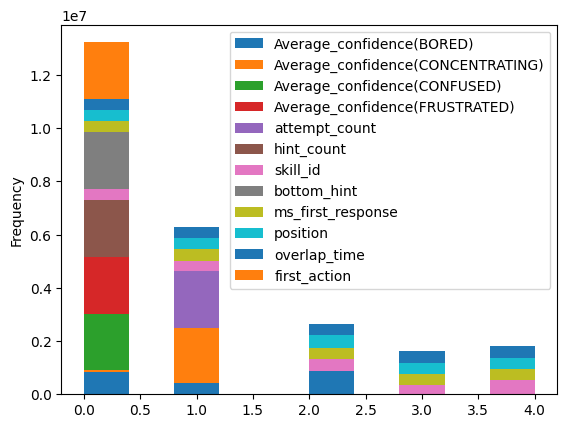

In [43]:
pd.DataFrame(quintiles.fit_transform(X_a[numerical_features_]), columns=numerical_features_).plot(kind='hist', stacked=True)

/home/fslab/github/mixed/.venv/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:291: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


<Axes: ylabel='Frequency'>

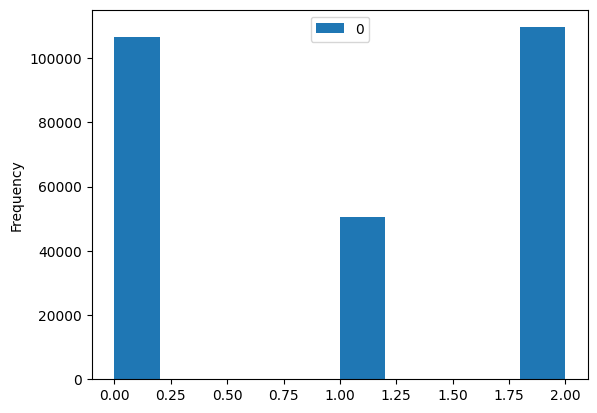

In [34]:
pd.DataFrame(quintiles.fit_transform(X_id[['Average_confidence(BORED)']])).plot(kind='hist')

In [2]:
import pandas as pd

In [3]:
test = pd.read_csv('tmp/nicolaswattiez/skillbuilder-data-2009-2010/2012-2013-data-with-predictions-4-final.csv')

In [7]:
test.index[7:50]

RangeIndex(start=7, stop=50, step=1)

In [64]:
test['problem_type']

0          choose_1
1           algebra
2           algebra
3           algebra
4          choose_1
             ...   
6123265    choose_1
6123266    choose_1
6123267     algebra
6123268    choose_1
6123269     algebra
Name: problem_type, Length: 6123270, dtype: object

In [92]:
{skill_id: skill for skill_id,skill in test[['skill_id','skill']].drop_duplicates().dropna().sort_values(by='skill_id').values}

{1.0: 'Box and Whisker',
 2.0: 'Circle Graph',
 4.0: 'Histogram as Table or Graph',
 5.0: 'Number Line',
 6.0: 'Line Plot',
 7.0: 'Sampling Techniques',
 8.0: 'Scatter Plot',
 9.0: 'Stem and Leaf Plot',
 10.0: 'Table',
 11.0: 'Venn Diagram',
 12.0: 'Mean',
 13.0: 'Median',
 14.0: 'Mode',
 15.0: 'Range',
 16.0: 'Counting Methods',
 17.0: 'Probability of Two Distinct Events',
 18.0: 'Probability of a Single Event',
 21.0: 'Interior Angles Figures with More than 3 Sides',
 22.0: 'Interior Angles Triangle',
 24.0: 'Congruence',
 25.0: 'Complementary and Supplementary Angles',
 26.0: 'Angles on Parallel Lines Cut by a Transversal',
 27.0: 'Pythagorean Theorem',
 32.0: 'Nets of 3D Figures',
 33.0: 'English and Metric Terminology',
 34.0: 'Unit Conversion Within a System',
 35.0: 'Effect of Changing Dimensions of a Shape Prportionally',
 36.0: 'Unit Conversion Standard to Metric',
 39.0: 'Area Circle',
 40.0: 'Circumference ',
 41.0: 'Definition Pi',
 42.0: 'Perimeter of a Polygon',
 43.0: 'R